<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/SentimentAnalysisOnAmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P V S N S GANESH KUMAR**

**22MCB0036**

**Amazon Reviews Analysis: [Dataset](https://www.kaggle.com/datasets/tarkkaanko/amazon?search=sentiment+analysis)**

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_reviews.csv')#,encoding='latin1')

In [3]:
# Data Dimensions
data.dropna(inplace=True)
data.shape

(4914, 2)

In [4]:
# Seeing the top rows of data
data.head()

,label,tweet
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4914 non-null   int64 
 1   tweet   4914 non-null   object
dtypes: int64(1), object(1)
memory usage: 115.2+ KB


In [6]:
data.describe()

,label
count,4914.000000
mean,4.587505
std,0.996929
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
# data['label'] = np.where(data['label']=='positive', 1, np.where(data['label']=='negative', -1, 0))

data['label'] = np.where(data['label'].isin([5]), 1,
                         np.where(data['label'].isin([1,2]), -1, 0))
data.head()


,label,tweet
0,0,No issues.
1,1,"Purchased this for my device, it worked as adv..."
2,0,it works as expected. I should have sprung for...
3,1,This think has worked out great.Had a diff. br...
4,1,"Bought it with Retail Packaging, arrived legit..."


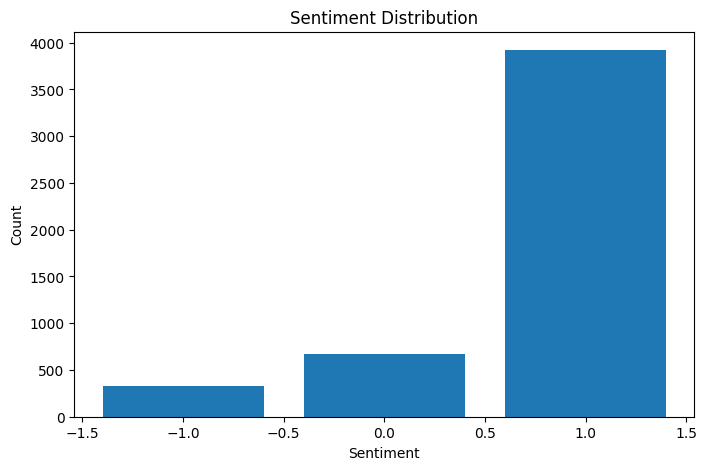

In [8]:
# Bar Plot visualization of No of observations for each label
sentiment_counts = data['label'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [9]:
labels = data['label'].value_counts()
numbers = labels.index
quantity = labels.values

import plotly.express as px 
figure = px.pie(data, values = quantity,  names =  numbers, hole = 0.5)
figure.update_layout(width=500, height=500)
figure.show()

In [10]:
# Importing required packages for preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data['tweet'] = data['tweet'].astype(str)
# Select the text part of the list
text = [i for i in data.tweet]
data.head()

,label,tweet
0,0,No issues.
1,1,"Purchased this for my device, it worked as adv..."
2,0,it works as expected. I should have sprung for...
3,1,This think has worked out great.Had a diff. br...
4,1,"Bought it with Retail Packaging, arrived legit..."


In [12]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]
for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [13]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [14]:
data['tweet'] = trim_list
data.head()

,label,tweet
0,0,No issues
1,1,Purchased this for my device it worked as adve...
2,0,it works as expected I should have sprung for ...
3,1,This think has worked out greatHad a diff bran...
4,1,Bought it with Retail Packaging arrived legit ...


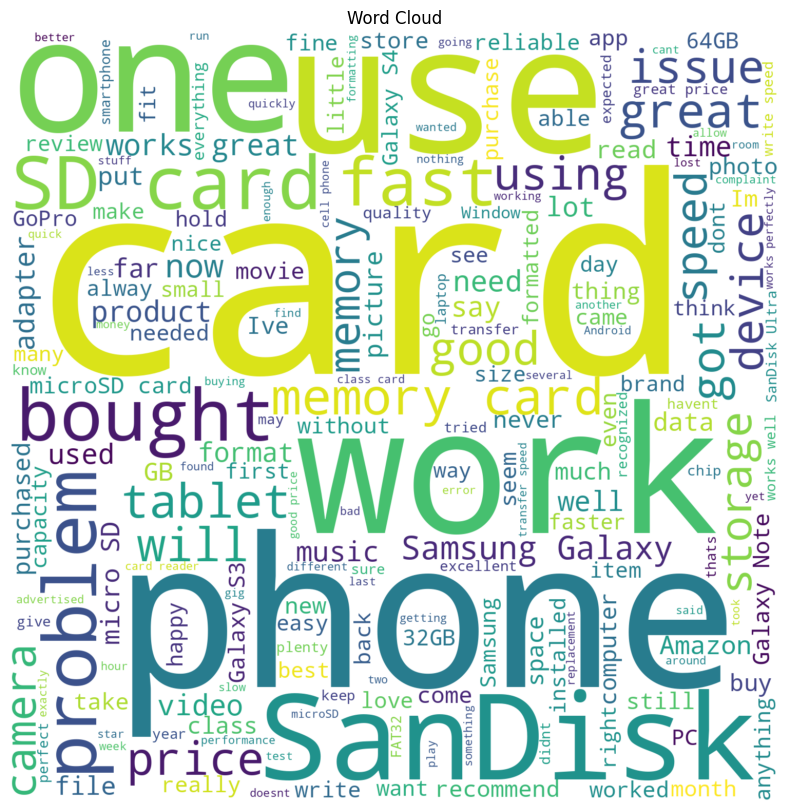

In [15]:
# Word Cloud visualization
from wordcloud import WordCloud

all_words = ' '.join(data['tweet'])
wordcloud = WordCloud(width=1500, height=1500, background_color='white').generate(all_words)

plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# **Splitting the data for train and test**

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.3,random_state=1)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# **VADER( Valence Aware Dictionary for Sentiment Reasoning) SentimentIntensityAnalyzer**

The Vader SentimentIntensityAnalyzer from NLTK is a pre-trained sentiment analysis tool that uses a pre-trained lexicon and heuristics to determine the sentiment of a text. It uses a list of words and their corresponding sentiment scores, which are manually annotated by human evaluators. The resulting compound score represents the overall sentiment polarity. The Vader lexicon is pre-trained on large datasets, providing reasonable sentiment analysis results without explicit training. However, performance may vary depending on the domain or context of the text data.

In [18]:
# Perform sentiment analysis using Vader from NLTK
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment_scores = data['tweet'].apply(lambda text: sia.polarity_scores(text))

# Extract the compound sentiment score
data['sentiment_SIA'] = sentiment_scores.apply(lambda scores: 1 if scores['compound'] > 0 else -1 if scores['compound'] < 0 else 0)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
data.head()

,label,tweet,sentiment_SIA
0,0,No issues,-1
1,1,Purchased this for my device it worked as adve...,-1
2,0,it works as expected I should have sprung for ...,-1
3,1,This think has worked out greatHad a diff bran...,1
4,1,Bought it with Retail Packaging arrived legit ...,1


In [20]:
# Performance metrics

y_true = data['label']
y_pred = data['sentiment_SIA']

# Calculate accuracy
accuracy_SIA = accuracy_score(y_true, y_pred)

# Calculate precision
precision_SIA = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall_SIA = recall_score(y_true, y_pred, average='weighted')

# Calculate F1-score
f1_SIA = f1_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_SIA)
print("Precision:", precision_SIA)
print("Recall:", recall_SIA)
print("F1-score:", f1_SIA)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.6923076923076923
Precision: 0.70848599710552
Recall: 0.6923076923076923
F1-score: 0.6919675982682366
Confusion Matrix:
 [[ 197   12  115]
 [ 173   38  458]
 [ 520  234 3167]]


# **Logistic Regression**

Logistic regression is a widely used machine learning algorithm for binary classification problems, focusing on the relationship between input features and class probabilities. It uses the logistic function to map input values to a probability between 0 and 1, and has a linear decision boundary. Logistic regression provides interpretable results by estimating coefficients associated with each input feature. Training involves MLE or gradient descent algorithms, regularization using techniques like L1 or L2 to prevent overfitting, and evaluation metrics like accuracy, precision, recall, F1 score, and AUC-ROC.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Make predictions on the test set
y_pred = log.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
# Evaluate performance
# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred)

# Calculate precision
precision_log = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_log = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_log = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1-score:", f1_log)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8311864406779661
Precision: 0.7915603012791759
Recall: 0.8311864406779661
F1-score: 0.778213738588433
Confusion Matrix:
 [[  33    5   56]
 [   7   12  173]
 [   1    7 1181]]


# **Naive Bayes**

Naïve Bayes is a supervised learning algorithm based on Bayes theorem, primarily used in text classification with high-dimensional training datasets. It is a probabilistic classifier, enabling quick predictions and applications in spam filtration, sentiment analysis, and article classification.

In [25]:
# Importing required packages
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [27]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# Evaluate performance
# Calculate accuracy
accuracy_Naive = accuracy_score(y_test, y_pred)

# Calculate precision
precision_Naive = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_Naive = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_Naive = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_Naive)
print("Precision:", precision_Naive)
print("Recall:", recall_Naive)
print("F1-score:", f1_Naive)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8061016949152542
Precision: 0.6497999425452455
Recall: 0.8061016949152542
F1-score: 0.7195607471878658
Confusion Matrix:
 [[   0    0   94]
 [   0    0  192]
 [   0    0 1189]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Decision Tree**

Decision Trees are a widely used machine learning algorithm for classification and regression tasks. They have a hierarchical structure, split data using criteria like Gini impurity and information gain, and select the best feature based on these criteria. They can handle categorical and numerical data but are prone to overfitting. Strategies like pruning, depth setting, and minimum sample split criteria control overfitting and improve generalization.

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Create the decision tree classifier with desired hyperparameters
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the model
model.fit(X_train_vectorized, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# Evaluate performance
# Calculate accuracy
accuracy_decision= accuracy_score(y_test, y_pred)

# Calculate precision
precision_decision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_decision = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_decision = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_decision)
print("Precision:", precision_decision)
print("Recall:", recall_decision)
print("F1-score:", f1_decision)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7979661016949152
Precision: 0.7436877979848446
Recall: 0.7979661016949152
F1-score: 0.7610398283756573
Confusion Matrix:
 [[  27   15   52]
 [   5   20  167]
 [  19   40 1130]]


# **BI-LSTM**

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from gensim.models import Word2Vec
# or
# from gensim.models import FastText
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
import gensim.downloader as api


In [34]:
tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)


In [49]:
# Load pre-trained GloVe word embeddings
word_embeddings = api.load('glove-twitter-25')  # or FastText.load('path_to_fasttext_model')
word_embedding_dim = word_embeddings.vector_size

In [50]:
with strategy.scope():
  # Define the BI-LSTM model
  model = Sequential()
  model.add(Embedding(input_dim=len(word_embeddings.key_to_index), output_dim=word_embedding_dim, weights=[word_embeddings.vectors], trainable=False))
  model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
# Train the model
X_train_dense = X_train_vectorized.toarray()

# Train the model using the TPU strategy
with strategy.scope():
  model.fit(X_train_dense,y_train, epochs=4)


Epoch 1/4
108/108 [==============================] - 157s 1s/step - loss: 0.5957 - accuracy: 0.7938
Epoch 2/4
108/108 [==============================] - 141s 1s/step - loss: 0.5891 - accuracy: 0.7944
Epoch 3/4
108/108 [==============================] - 141s 1s/step - loss: 0.5910 - accuracy: 0.7944
Epoch 4/4
108/108 [==============================] - 141s 1s/step - loss: 0.5891 - accuracy: 0.7944


In [52]:
# Make predictions
X_test_dense = X_test_vectorized.toarray()
y_pred = model.predict(X_test_dense)

47/47 [==============================] - 19s 384ms/step


In [53]:
y_pred

array([[0.64484173],
       [0.64484173],
       [0.64484173],
       ...,
       [0.64484173],
       [0.64484173],
       [0.64484173]], dtype=float32)

In [54]:
y_pred = np.where(y_pred > 0.5, 1, np.where(y_pred < 0.5, -1, 0))

In [55]:
# Evaluate performance
# Calculate accuracy
accuracy_LSTM= accuracy_score(y_test, y_pred)

# Calculate precision
precision_LSTM = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_LSTM = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_LSTM = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_LSTM)
print("Precision:", precision_LSTM)
print("Recall:", recall_LSTM)
print("F1-score:", f1_LSTM)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8061016949152542
Precision: 0.6497999425452455
Recall: 0.8061016949152542
F1-score: 0.7195607471878658
Confusion Matrix:
 [[   0    0   94]
 [   0    0  192]
 [   0    0 1189]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Transformer based model with BERT-based word embedding.**

In [42]:
import tensorflow as tf
import os
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Tokenize the input data
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
encoded_train_data = tokenizer.batch_encode_plus(
    X_train.tolist(),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='tf'
)

encoded_test_data = tokenizer.batch_encode_plus(
    X_test.tolist(),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='tf'
)

X_train_ids = encoded_train_data['input_ids']
X_train_attention_mask = encoded_train_data['attention_mask']
X_test_ids = encoded_test_data['input_ids']
X_test_attention_mask = encoded_test_data['attention_mask']


# Convert label values to categorical format
num_classes = len(set(y_train))
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)


In [44]:
with strategy.scope():
    # Load the BERT model and tokenizer
    model_name = "bert-base-uncased"
    bert_model = TFAutoModel.from_pretrained(model_name)    
    # Create the BERT-based model
    input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32)

    embeddings = bert_model(input_ids, attention_mask=attention_mask)[0]
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(embeddings[:, 0, :])

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])



Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [45]:
# Convert label values to categorical format
num_classes = len(set(y_train))
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

# Train the model
with strategy.scope():
    model.fit(
        x=[X_train_ids, X_train_attention_mask],
        y=y_train_categorical,
        epochs=3,
        batch_size=32
        )

Epoch 1/3


108/108 [==============================] - 157s 463ms/step - loss: 0.6085 - accuracy: 0.7793
Epoch 2/3
108/108 [==============================] - 9s 80ms/step - loss: 0.4500 - accuracy: 0.8316
Epoch 3/3
108/108 [==============================] - 8s 78ms/step - loss: 0.3602 - accuracy: 0.8630


In [46]:
# Make predictions
y_pred = model.predict([X_test_ids, X_test_attention_mask])
y_pred

47/47 [==============================] - 23s 218ms/step


array([[1.9947354e-02, 9.8001319e-01, 3.9495455e-05],
       [2.4225917e-02, 9.7571993e-01, 5.4095690e-05],
       [2.3502294e-02, 9.7643572e-01, 6.2055355e-05],
       ...,
       [8.4219016e-03, 9.9145383e-01, 1.2426286e-04],
       [3.2882482e-01, 5.1916420e-01, 1.5201087e-01],
       [1.9524392e-02, 9.8026395e-01, 2.1157938e-04]], dtype=float32)

In [47]:
# Convert predictions to labels
y_pred = tf.argmax(y_pred, axis=1).numpy()
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
# Evaluate performance
# Calculate accuracy
accuracy_bert= accuracy_score(y_test, y_pred)

# Calculate precision
precision_bert = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_bert = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1_bert = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy_bert)
print("Precision:", precision_bert)
print("Recall:", recall_bert)
print("F1-score:", f1_bert)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8040677966101695
Precision: 0.7602660806263791
Recall: 0.8040677966101695
F1-score: 0.7698753809347306
Confusion Matrix:
 [[   0   13   16   65]
 [   0   24  148   20]
 [   0   21 1162    6]
 [   0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



# **Performance Metrics**

**Accuracy:**
Accuracy measures the overall correctness of predictions by dividing the number of correctly classified instances by the total number of instances.

**Precision:**
Precision quantifies the proportion of true positive predictions among all positive predictions, indicating the model's ability to avoid false positives.

**Recall:**
Recall calculates the proportion of true positive predictions among all actual positive instances, reflecting the model's ability to identify positive instances correctly.

**F1 Score:**
F1 score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance by considering both false positives and false negatives.





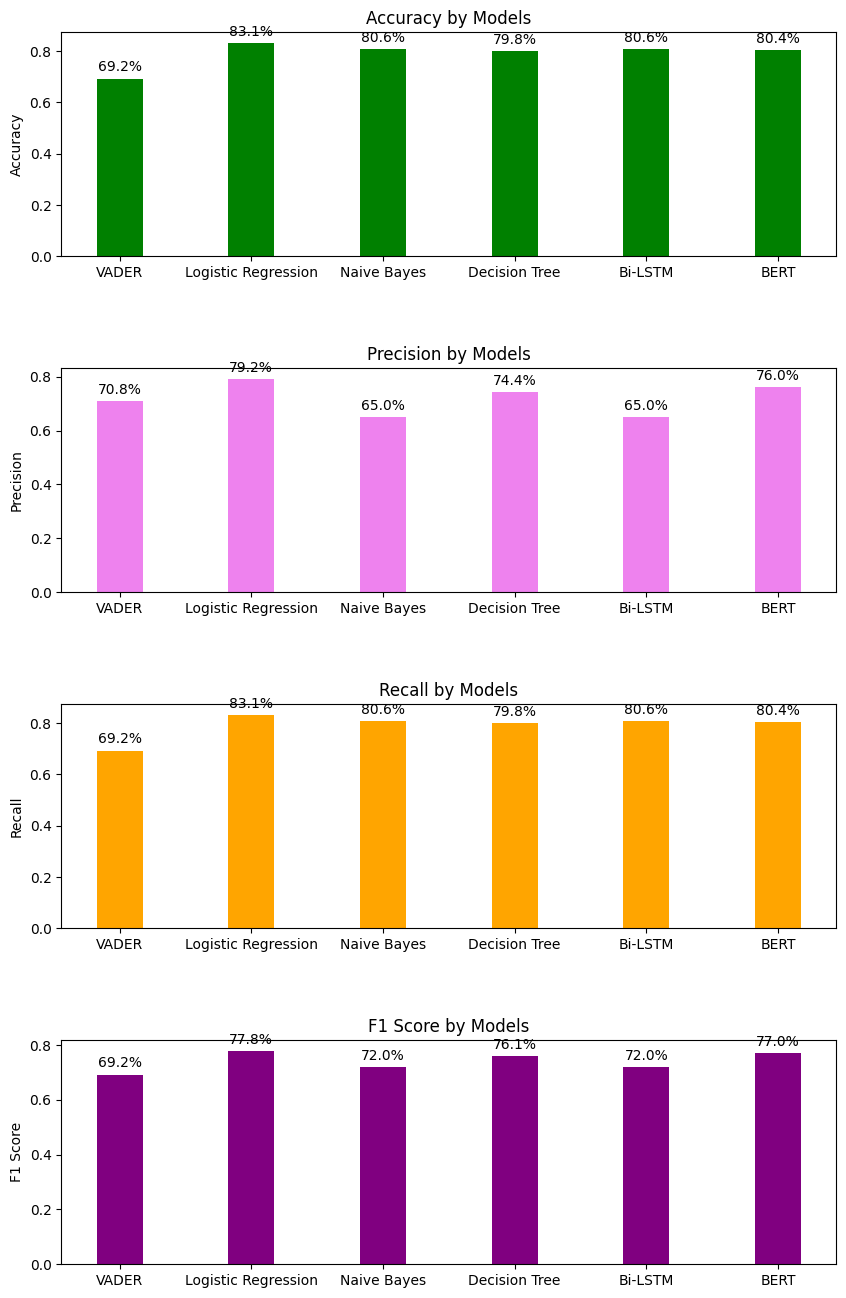

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their performance metrics
models = ['VADER', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Bi-LSTM', 'BERT']
accuracy = [accuracy_SIA, accuracy_log, accuracy_Naive, accuracy_decision, accuracy_LSTM, accuracy_bert]
precision = [precision_SIA, precision_log, precision_Naive, precision_decision, precision_LSTM, precision_bert]
recall = [recall_SIA, recall_log, recall_Naive, recall_decision, recall_LSTM, recall_bert]
f1 = [f1_SIA, f1_log, f1_Naive, f1_decision, f1_LSTM, f1_bert]

# Set the width of the bars
bar_width = 0.35

# Set the spacing between each model's bars
model_spacing = 0.5

# Create subplots for each performance metric
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data = [accuracy, precision, recall, f1]
colors = ['green', 'violet', 'orange','purple']

# Plot each performance metric
for i in range(4):
    axs[i].bar(models, data[i], color=colors[i], width=bar_width)
    axs[i].set_ylabel(metrics[i])
    axs[i].set_xticks(range(len(models)))
    axs[i].set_xticklabels(models)
    axs[i].set_title(f'{metrics[i]} by Models')

    # Add labels with percentage values on each bar
    for rect in axs[i].patches:
        height = rect.get_height()
        axs[i].annotate(f'{height:.1%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()
